In [1]:
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import PandasTools

c:\Users\user\miniconda3\envs\LG_newmoses\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# SMILES to molecular structure

In [2]:
smiles = pd.read_csv('../../vae_qm9_generated.csv')
smiles.head()

,SMILES
0,N#CC1C(=O)NC(=O)C1
1,COC1C(O)C12CC2O
2,CCC1CC1OCCO
3,COCc1cn(O)nn1
4,CCc1c[nH]c(=O)c1C


In [3]:
smiles['ROMol'] = smiles['SMILES'].apply(Chem.MolFromSmiles)


[08:53:51] Can't kekulize mol.  Unkekulized atoms: 2 3 7
[08:53:51] SMILES Parse Error: unclosed ring for input: 'CC1C2C3CCC2(C4)C12'
[08:53:51] SMILES Parse Error: ring closure 2 duplicates bond between atom 4 and atom 8 for input: 'CCCOC12CCCC12'
[08:53:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 7
[08:53:51] SMILES Parse Error: unclosed ring for input: 'N#CC12CC(C1)C2CCo1'
[08:53:51] SMILES Parse Error: unclosed ring for input: 'NC(=O)N1C2C3CC23C13'
[08:53:51] SMILES Parse Error: unclosed ring for input: 'CC1OC2CNC1CO'
[08:53:51] SMILES Parse Error: unclosed ring for input: 'Nc1cccn2n1'
[08:53:51] SMILES Parse Error: unclosed ring for input: 'C1CC2OC4(CCC31)C2'
[08:53:51] Can't kekulize mol.  Unkekulized atoms: 4 6
[08:53:51] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6
[08:53:51] SMILES Parse Error: unclosed ring for input: 'O=C1CC2C(O)C(C2)C11'
[08:53:51] SMILES Parse Error: unclosed ring for input: 'c1nn(C2CC2CC2)n1'
[08:53:51] Explicit valence for atom # 8 N, 4, is gr

In [4]:
smiles.head()

,SMILES,ROMol
0,N#CC1C(=O)NC(=O)C1,<rdkit.Chem.rdchem.Mol object at 0x00000277DB2...
1,COC1C(O)C12CC2O,<rdkit.Chem.rdchem.Mol object at 0x00000277DB2...
2,CCC1CC1OCCO,<rdkit.Chem.rdchem.Mol object at 0x00000277DB2...
3,COCc1cn(O)nn1,<rdkit.Chem.rdchem.Mol object at 0x00000277DB2...
4,CCc1c[nH]c(=O)c1C,None


c:\Users\user\miniconda3\envs\LG_newmoses\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


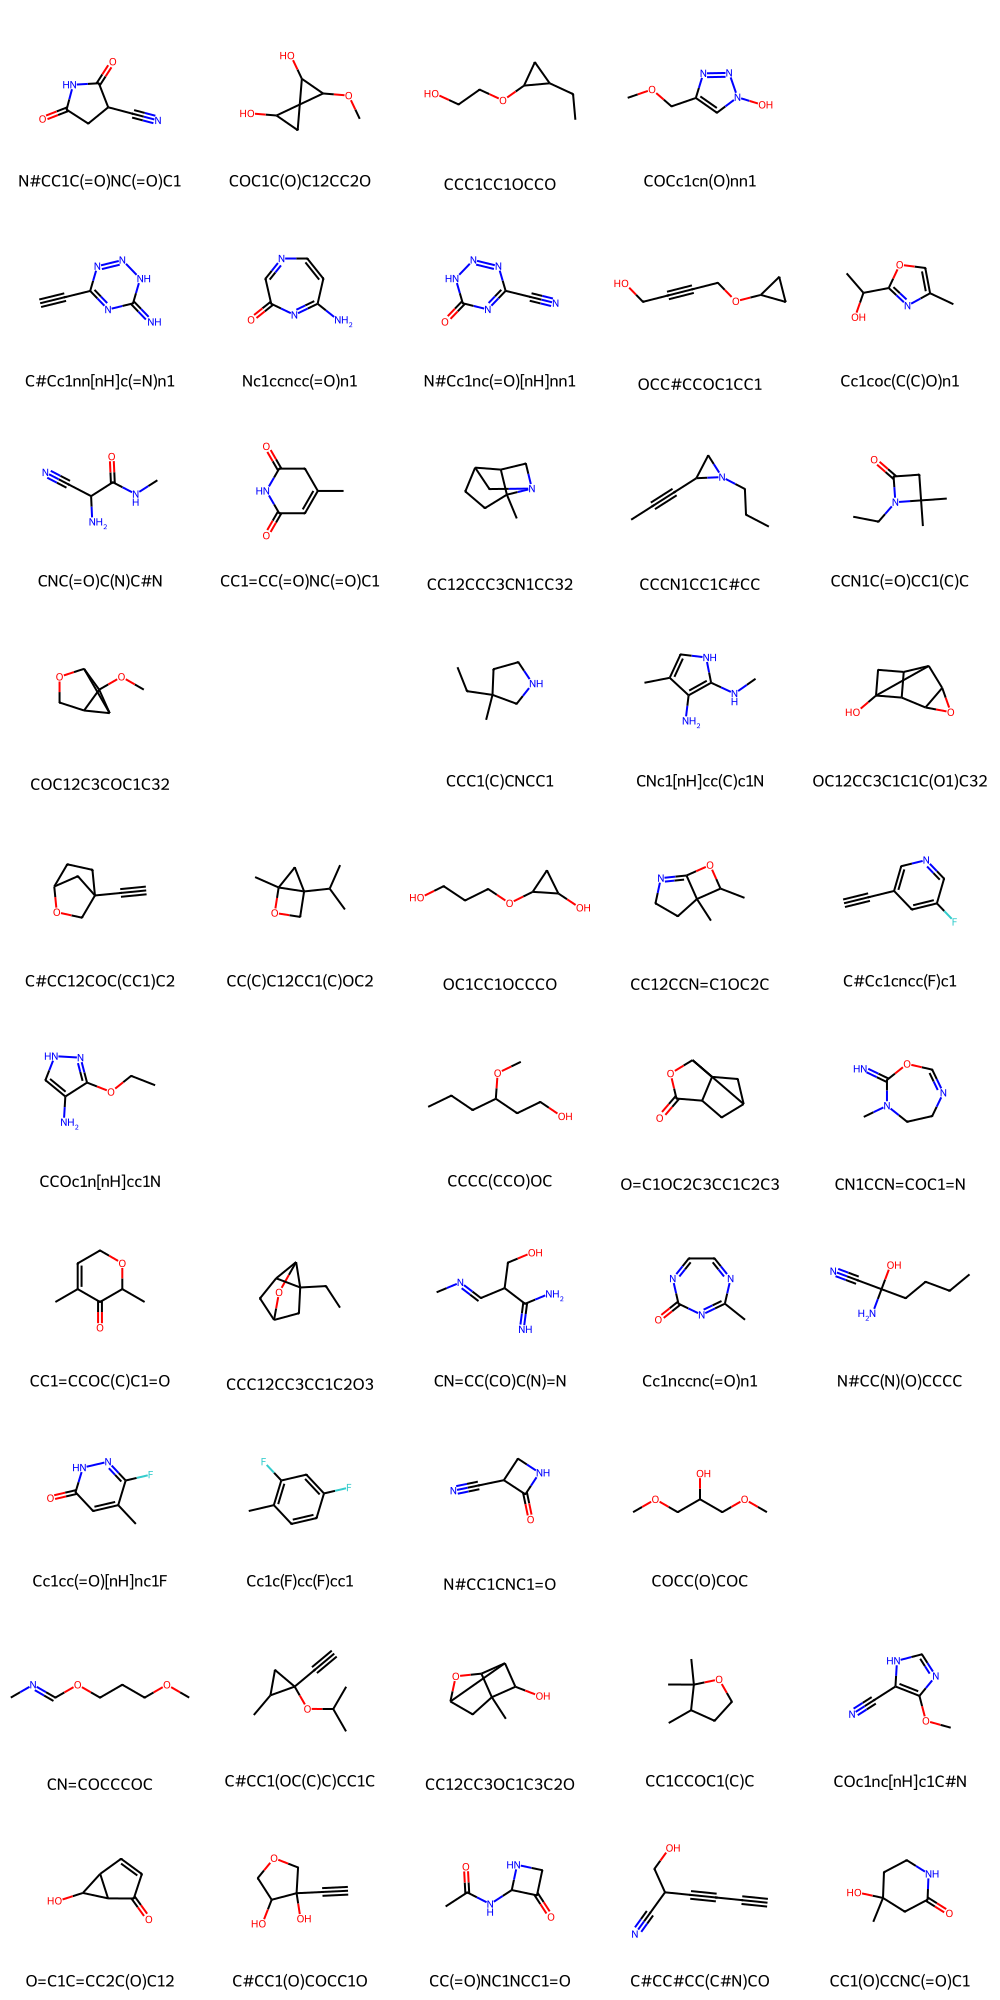

In [5]:
display(PandasTools.FrameToGridImage(smiles, column='ROMol', legendsCol='SMILES', molsPerRow=5))

In [16]:
smiles

,SMILES,ROMol
0,N#CC1C(=O)NC(=O)C1,<rdkit.Chem.rdchem.Mol object at 0x000001BD27B...
1,COC1C(O)C12CC2O,<rdkit.Chem.rdchem.Mol object at 0x000001BD28B...
2,CCC1CC1OCCO,<rdkit.Chem.rdchem.Mol object at 0x000001BD28B...
3,COCc1cn(O)nn1,<rdkit.Chem.rdchem.Mol object at 0x000001BD28B...
4,CCc1c[nH]c(=O)c1C,None
...,...,...
29995,OC1CC2(CC2)C1CO,<rdkit.Chem.rdchem.Mol object at 0x000001BD35C...
29996,N#CC(N)C(O)CCO,<rdkit.Chem.rdchem.Mol object at 0x000001BD35C...
29997,N#CC12CC3(CN1)CC23,<rdkit.Chem.rdchem.Mol object at 0x000001BD35C...
29998,CC(=O)Nc1ncno1,<rdkit.Chem.rdchem.Mol object at 0x000001BD35C...


# Latent Space Visualization

In [20]:
model_path = '../../ZINC_vae/vae_model_040.pt'
model = torch.load(model_path)

In [26]:
import sys
sys.path.append("../moses/vae")
from model import VAE

sys.path.append("../moses")
from utils import CharVocab, StringDataset



In [28]:
train = moses.get_dataset('train')
vocab = CharVocab.from_data(train)

NameError: name 'moses' is not defined

In [27]:
model = VAE()
model.load_state_dict(torch.load(model_path))

TypeError: __init__() missing 2 required positional arguments: 'vocab' and 'config'

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [10]:
# check curent directory
import os
print(os.getcwd())

e:\SNU_MMMPDL\SNU_MASTER\UofT\LG_project\NewMoses\notebooks


In [24]:
data1 = torch.load('../../ZINC_vae/vae_model_000.pt')
data2 = torch.load('../../ZINC_vae/vae_model_020.pt')
data3 = torch.load('../../ZINC_vae/vae_model_040.pt')

print(data1.keys())
print(data2.keys())
print(data3.keys())



odict_keys(['x_emb.weight', 'encoder_rnn.weight_ih_l0', 'encoder_rnn.weight_hh_l0', 'encoder_rnn.bias_ih_l0', 'encoder_rnn.bias_hh_l0', 'q_mu.weight', 'q_mu.bias', 'q_logvar.weight', 'q_logvar.bias', 'decoder_rnn.weight_ih_l0', 'decoder_rnn.weight_hh_l0', 'decoder_rnn.bias_ih_l0', 'decoder_rnn.bias_hh_l0', 'decoder_rnn.weight_ih_l1', 'decoder_rnn.weight_hh_l1', 'decoder_rnn.bias_ih_l1', 'decoder_rnn.bias_hh_l1', 'decoder_rnn.weight_ih_l2', 'decoder_rnn.weight_hh_l2', 'decoder_rnn.bias_ih_l2', 'decoder_rnn.bias_hh_l2', 'decoder_lat.weight', 'decoder_lat.bias', 'decoder_fc.weight', 'decoder_fc.bias', 'encoder.0.weight_ih_l0', 'encoder.0.weight_hh_l0', 'encoder.0.bias_ih_l0', 'encoder.0.bias_hh_l0', 'encoder.1.weight', 'encoder.1.bias', 'encoder.2.weight', 'encoder.2.bias', 'decoder.0.weight_ih_l0', 'decoder.0.weight_hh_l0', 'decoder.0.bias_ih_l0', 'decoder.0.bias_hh_l0', 'decoder.0.weight_ih_l1', 'decoder.0.weight_hh_l1', 'decoder.0.bias_ih_l1', 'decoder.0.bias_hh_l1', 'decoder.0.weight_

# print molecule structure

In [26]:
gen_molecule = pd.read_csv('../../vae_qm9_generated.csv')
gen_molecule.head

<bound method NDFrame.head of                    SMILES
0      N#CC1C(=O)NC(=O)C1
1         COC1C(O)C12CC2O
2             CCC1CC1OCCO
3           COCc1cn(O)nn1
4       CCc1c[nH]c(=O)c1C
...                   ...
29995     OC1CC2(CC2)C1CO
29996      N#CC(N)C(O)CCO
29997  N#CC12CC3(CN1)CC23
29998      CC(=O)Nc1ncno1
29999      CC1C(C#N)CC1CO

[30000 rows x 1 columns]>

In [23]:
config

Namespace(checkpoint_dir='./checkpoints', clip_grad=50, config_save='./checkpoints/ZINC_vae_20240515_021753/vae_config.pt', d_cell='gru', d_d_h=512, d_dropout=0, d_n_layers=3, d_z=128, data='ZINC', device='cuda:1', experiment_suff='', freeze_embeddings=False, kl_start=0, kl_w_end=0.05, kl_w_start=0, log_file='./checkpoints/ZINC_vae_20240515_021753/vae_log.txt', lr_end=0.00030000000000000003, lr_n_mult=1, lr_n_period=10, lr_n_restarts=10, lr_start=0.00030000000000000003, metrics='metrics.csv', model='vae', model_save='./checkpoints/ZINC_vae_20240515_021753/vae_model.pt', n_batch=4096, n_jobs=8, n_last=1000, n_samples=30000, n_workers=0, nowandb=0, ptest_path=None, ptest_scaffolds_path=None, q_bidir=False, q_cell='gru', q_d_h=256, q_dropout=0.5, q_n_layers=1, save_frequency=20, seed=0, test_path=None, test_scaffolds_path=None, test_size=None, train_load=None, train_path=None, train_size=None, use_selfies=False, val_load=None, vocab_load=None, vocab_save='./checkpoints/ZINC_vae_20240515_0

In [16]:
data

OrderedDict([('x_emb.weight',
              tensor([[ 1.2736e+00,  1.2073e-01, -4.4080e-02, -2.3776e-01,  3.1556e-01,
                        4.6167e-02, -1.1589e-01, -1.6854e-01,  4.9830e-02, -1.0136e-02,
                        3.1512e-01,  2.2217e-01, -1.4102e-01,  2.7183e-01,  2.9690e-01,
                       -3.1650e-01,  2.4857e-02,  2.0339e-02,  3.4757e-01, -1.8026e-02,
                       -9.5441e-02, -1.7691e-03, -2.6132e-02, -5.0829e-02, -1.5424e-01,
                       -6.2214e-02, -8.8131e-02, -1.1919e-01,  3.0290e-01, -3.4951e-02],
                      [ 1.4734e-01,  1.1347e+00, -2.0395e-02, -2.0627e-01, -1.4787e-01,
                       -1.4420e-01, -1.0554e-01, -1.1569e-01, -1.1953e-01, -1.0477e-01,
                        1.0133e-01,  6.8201e-02,  1.0829e-01, -4.1521e-02,  6.2733e-04,
                        5.5123e-02,  1.6628e-02,  1.9112e-01,  3.3265e-02, -1.0137e-01,
                       -9.6511e-02, -2.7180e-01, -2.0049e-01,  1.2592e-02, -1.5057e-01,
 